In [6]:
!git clone https://github.com/kairess/license_plate_recognition.git

fatal: destination path 'license_plate_recognition' already exists and is not an empty directory.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [107]:
pwd

'/content'

# 데이터 전처리

## 이미지 읽고, Grayscail

rat_imgs//000000012_000000799_d.png


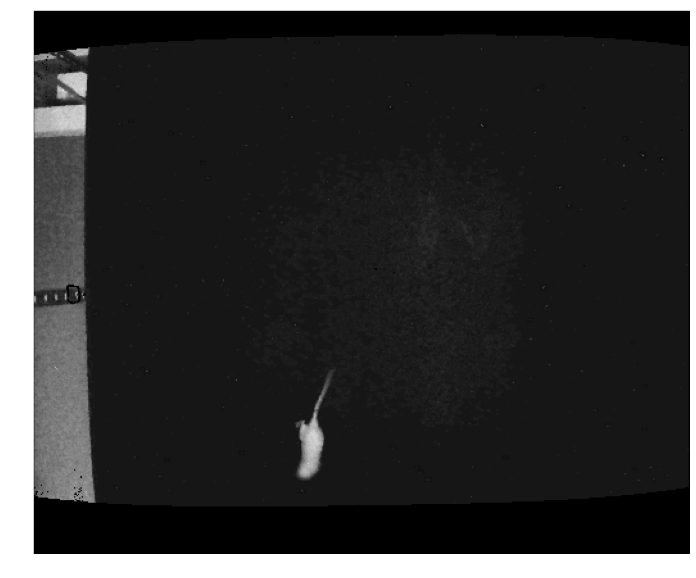

In [108]:
# 이미지 읽어오기
import os
base_path = 'rat_imgs/'
img_list = os.listdir(base_path)
img_ori = cv2.imread(base_path +'/'+img_list[1])
print(base_path +'/'+img_list[0])
height,width, channel = img_ori.shape

gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

### Threshold

#### Blurred 
- 일부러 뿌옅게 만들어 noise를 줄인다.

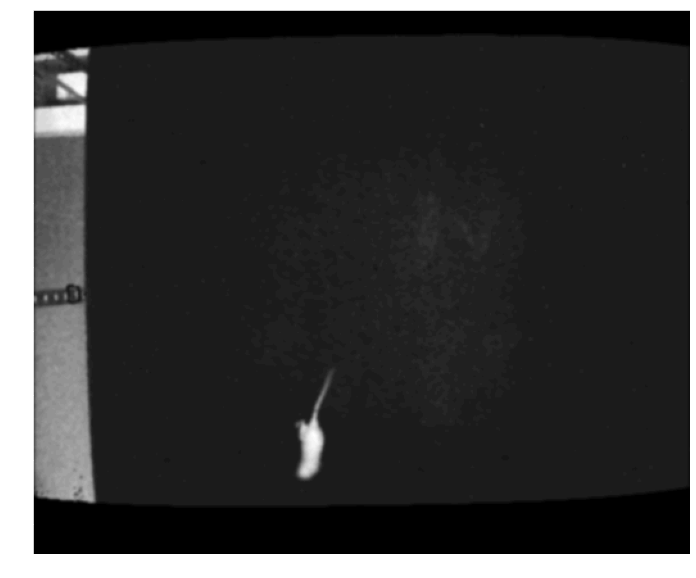

In [82]:
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)
plt.figure(figsize=(12, 10))
plt.imshow(img_blurred, cmap='gray')

####  Threshold
- 특정 값을 기준으로, 기준보다 어두우면 아예 검은색으로, 기준보다 밝으면 아예 흰색으로 만듬

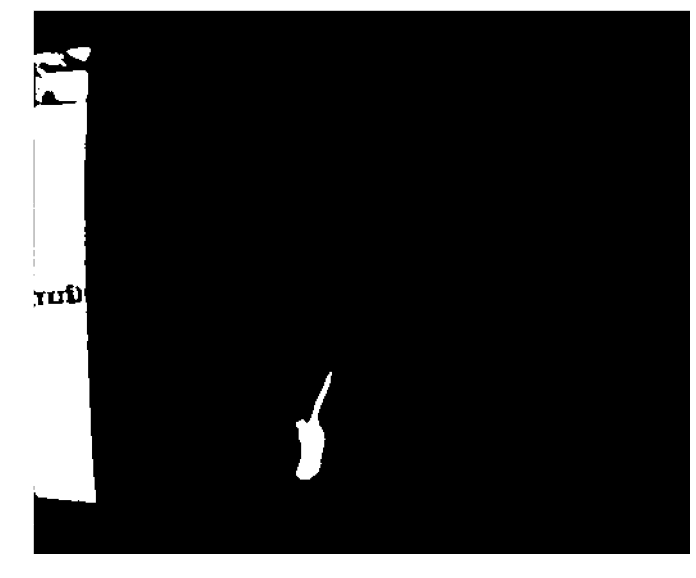

In [83]:
_, img_thresh = cv2.threshold(img_blurred,10,255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')

##  Contours: 윤곽선찾기

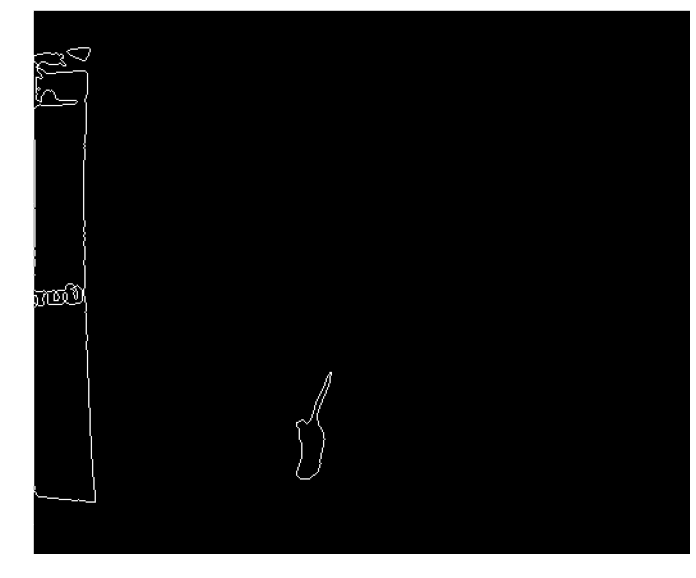

In [87]:
contours, hierachy = cv2.findContours(img_thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)


## 사각형 찾기

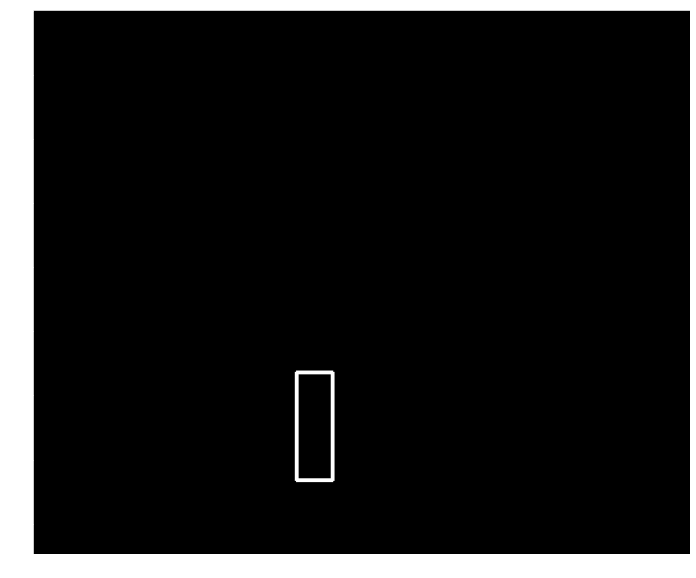

In [85]:

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if(x>100):
      cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
      
      # insert to dict
      contours_dict.append({
          'contour': contour,
          'x': x,
          'y': y,
          'w': w,
          'h': h,
          'cx': x + (w / 2),
          'cy': y + (h / 2)
      })

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

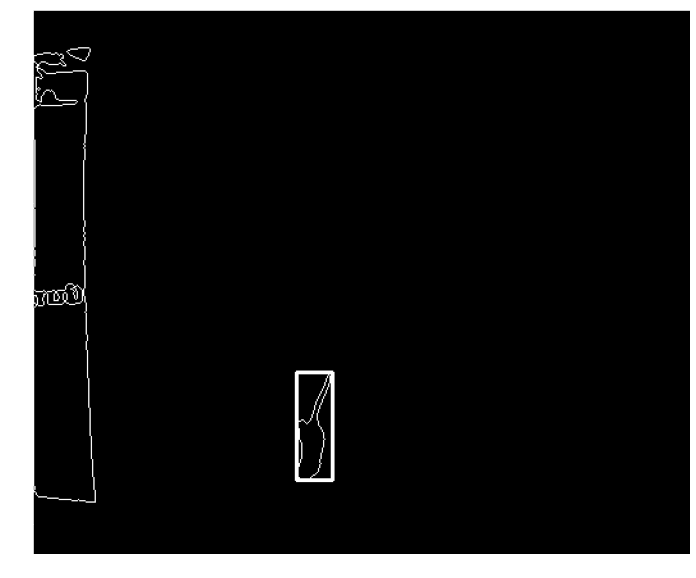

In [88]:
contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if(x>100):
      cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
      
      # insert to dict
      contours_dict.append({
          'contour': contour,
          'x': x,
          'y': y,
          'w': w,
          'h': h,
          'cx': x + (w / 2),
          'cy': y + (h / 2)
      })

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

# 함수화

## GrayScale

In [68]:
def GrayScale(image_path):
  import cv2
  img_ori = cv2.imread(image_path)
  gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
  return gray

## Blurred

In [69]:
def Blur(gray):
  return cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

## Threshold

In [70]:
def Threshold(img_blurred, thresh=10):
  _, img_thresh = cv2.threshold(img_blurred,thresh,255, cv2.THRESH_BINARY)
  return img_thresh

##Contours

In [75]:
def Contours(img_thresh):
  height,width = img_thresh.shape
  contours, _ = cv2.findContours(img_thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  return contours

## 사각형 찾기

In [76]:
def get_Rect(contours):
  cordinates = []
  for contour in contours:
      x, y, w, h = cv2.boundingRect(contour)
      if(x>100):
        cordinates.append((x, y, w, h))
  return cordinates

In [77]:
def get_labels(image_path):
  gray = GrayScale(image_path)
  blur = Blur(gray)
  threshold = Threshold(blur)
  contours = Contours(threshold)
  return get_Rect(contours)


In [91]:
# 이미지 읽어오기
import os
import pandas as pd

base_path = 'rat_imgs/'
img_list = os.listdir(base_path)

label_list = []
err_list = []
for img in img_list:
  img_path = base_path+'/'+img
  label = get_labels(img_path)
  if label:
    label_list.append([img_path] + label)
  else:
    err_list.append(img_path)
    print(img_path, label)

print(len(img_list))
print(len(label_list))
print(len(err_list))


/content/rat_imgs/000000012_000000799_d.png []
/content/rat_imgs/000000021_000001399_d.png []
/content/rat_imgs/000000016_000001066_d.png []
/content/rat_imgs/000000006_000000399_d.png []
/content/rat_imgs/000000033_000002199_d.png []
/content/rat_imgs/000000026_000001733_d.png []
/content/rat_imgs/000000014_000000933_d.png []
/content/rat_imgs/000000020_000001333_d.png []
/content/rat_imgs/000000028_000001866_d.png []
/content/rat_imgs/000000025_000001666_d.png []
/content/rat_imgs/000000002_000000134_d.png []
/content/rat_imgs/000000000_000000000_d.png []
/content/rat_imgs/000000039_000002599_d.png []
/content/rat_imgs/000000004_000000266_d.png []
/content/rat_imgs/000000015_000000999_d.png []
/content/rat_imgs/000000031_000002066_d.png []
/content/rat_imgs/000000010_000000666_d.png []
/content/rat_imgs/000000018_000001199_d.png []
/content/rat_imgs/000000042_000002799_d.png []
/content/rat_imgs/000000035_000002333_d.png []
/content/rat_imgs/000000044_000002933_d.png []
/content/rat_

# 라벨 이미지 출력해보기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


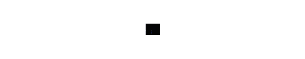

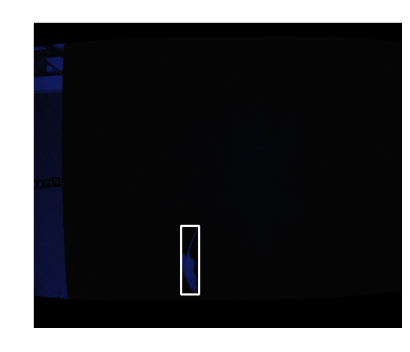

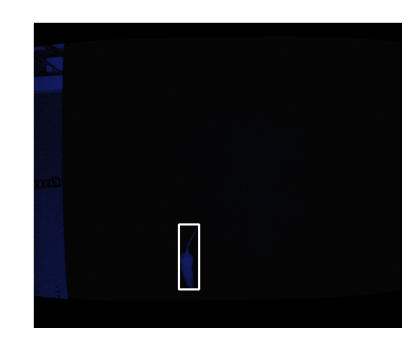

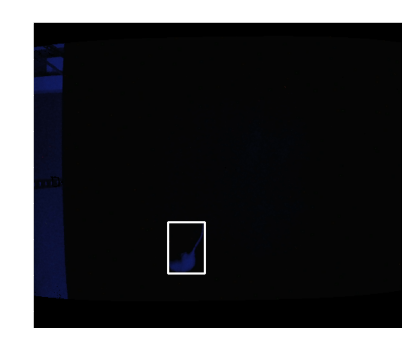

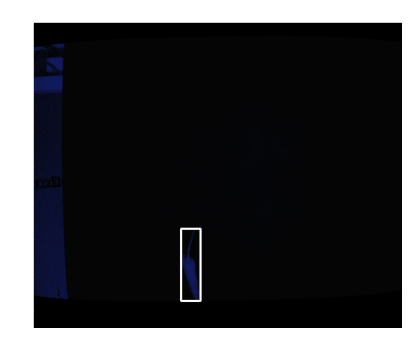

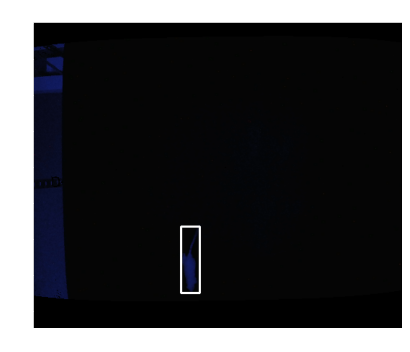

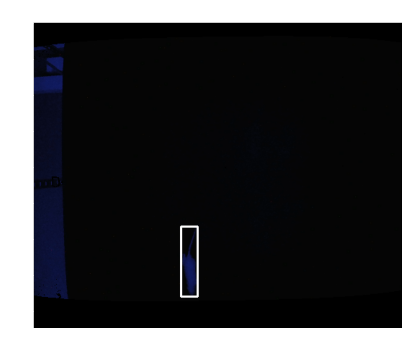

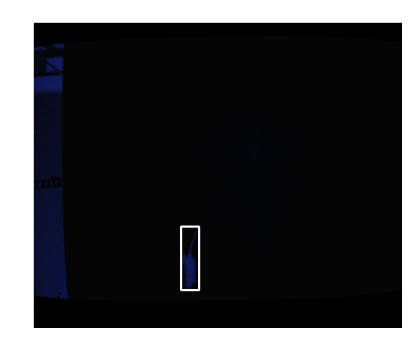

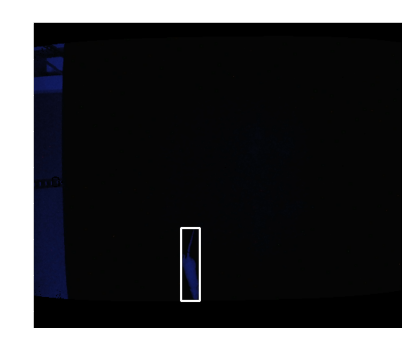

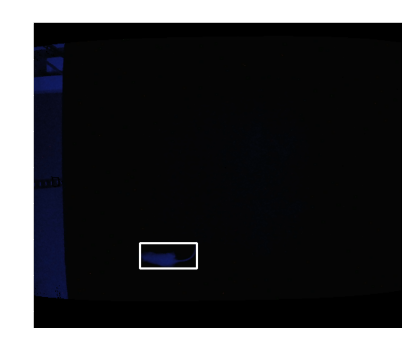

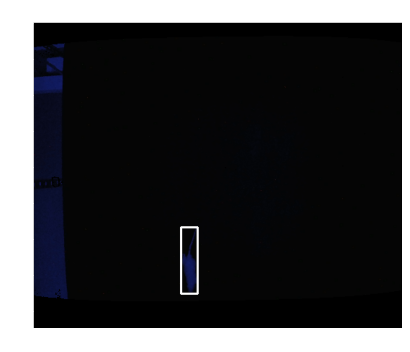

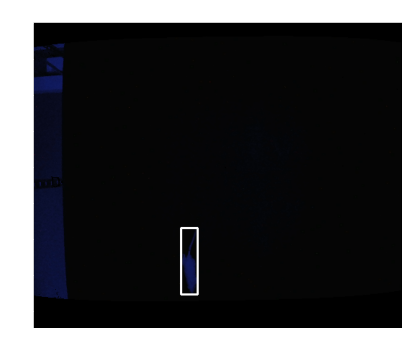

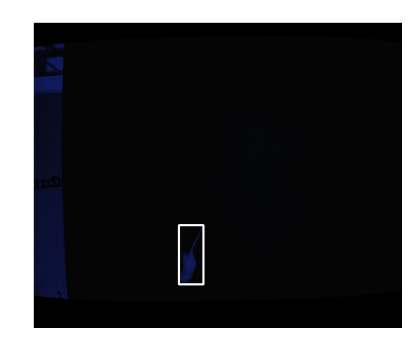

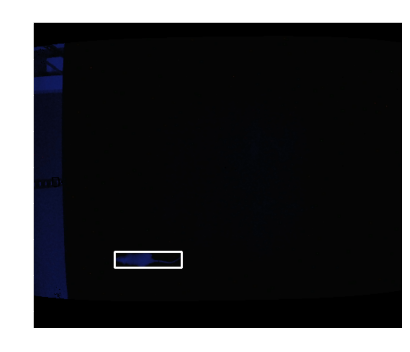

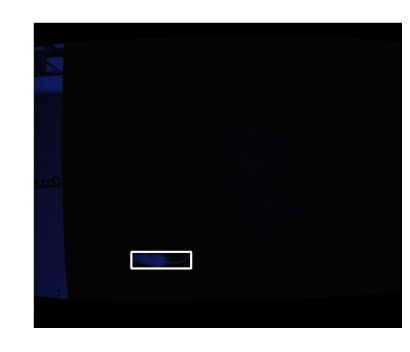

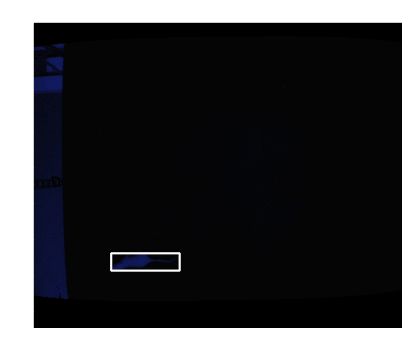

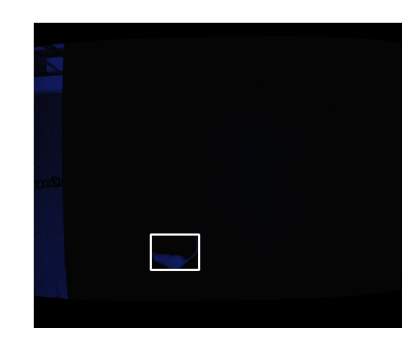

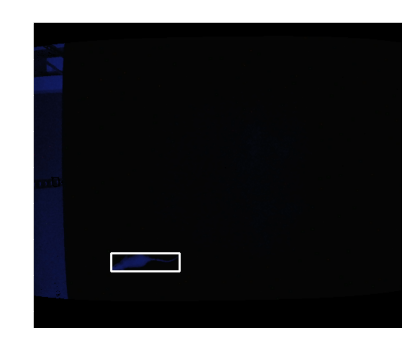

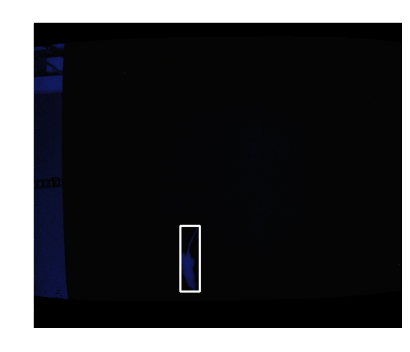

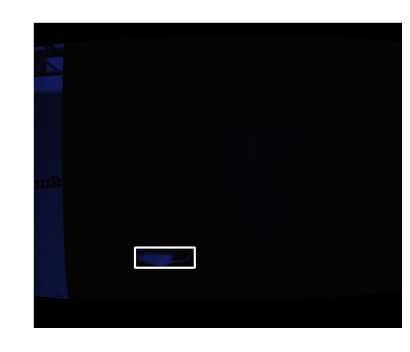

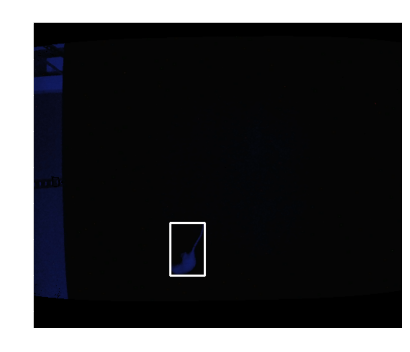

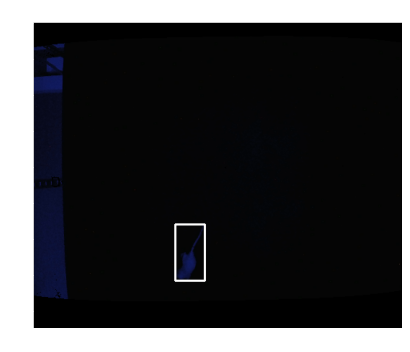

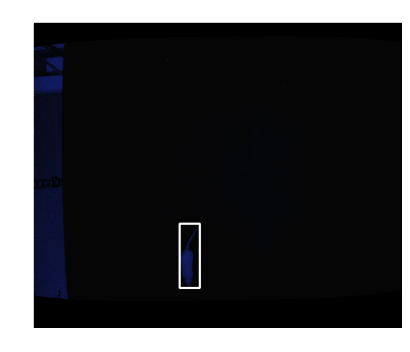

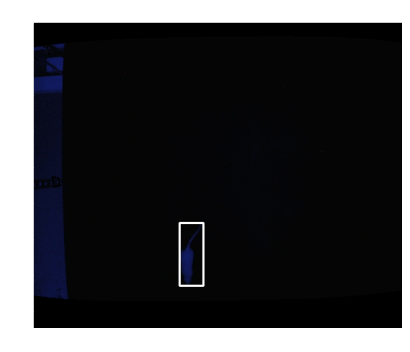

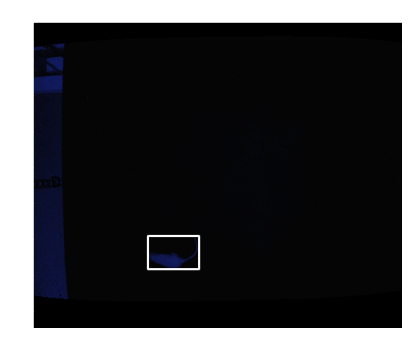

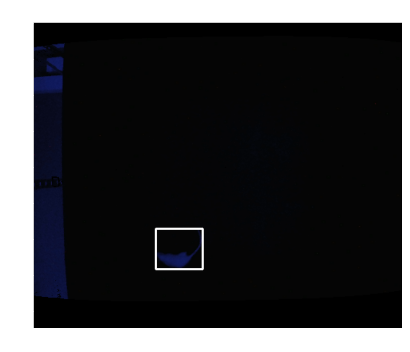

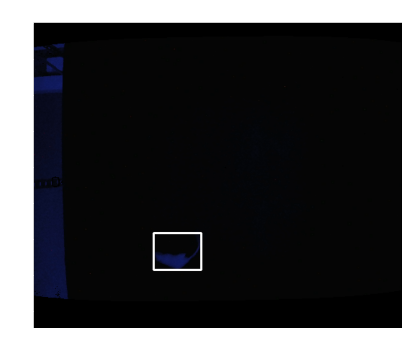

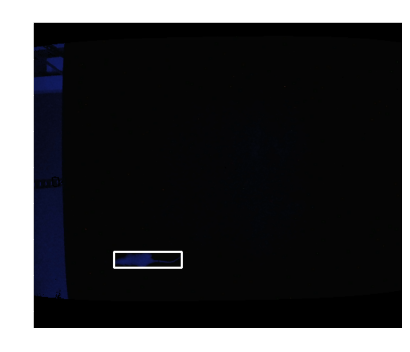

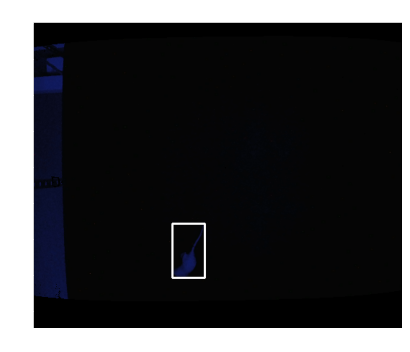

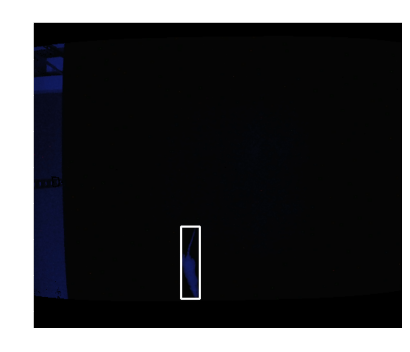

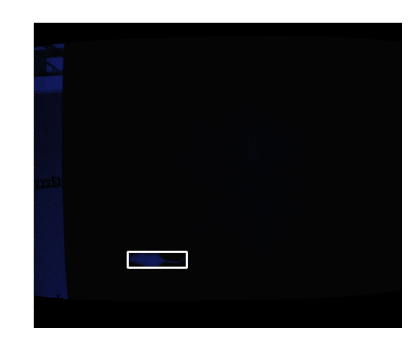

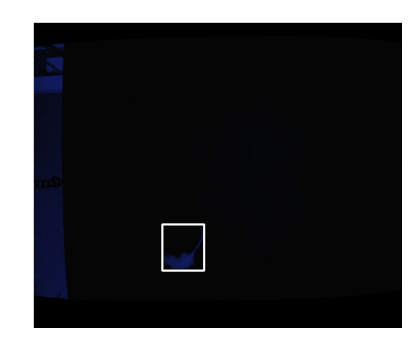

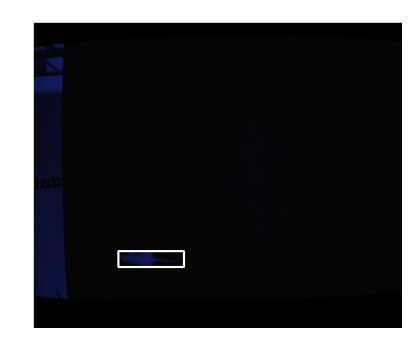

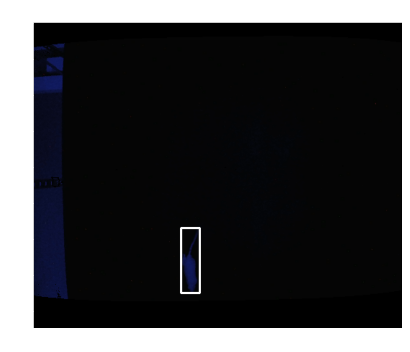

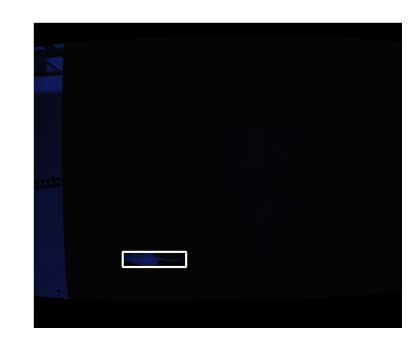

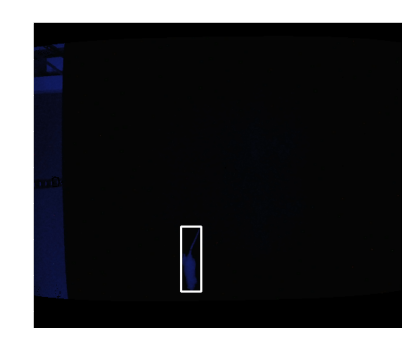

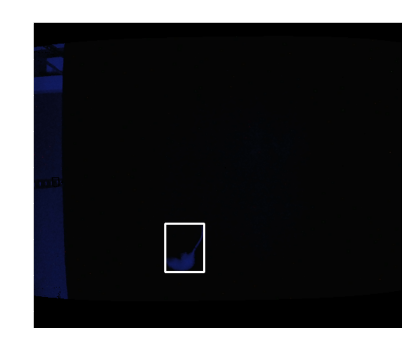

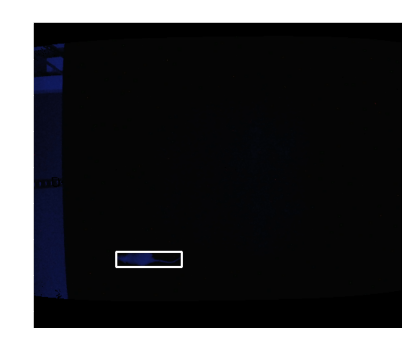

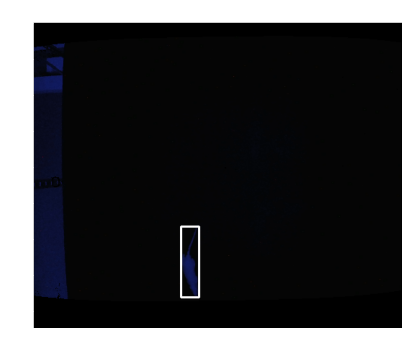

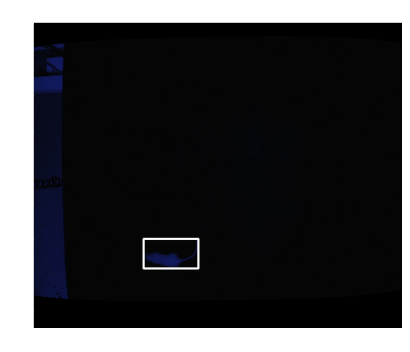

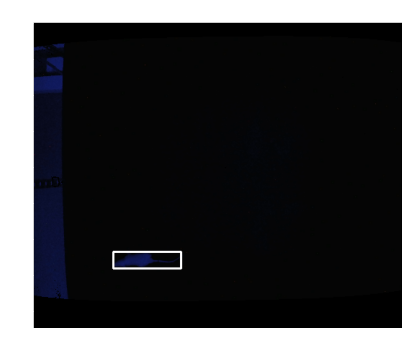

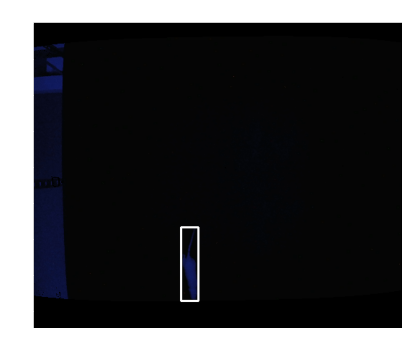

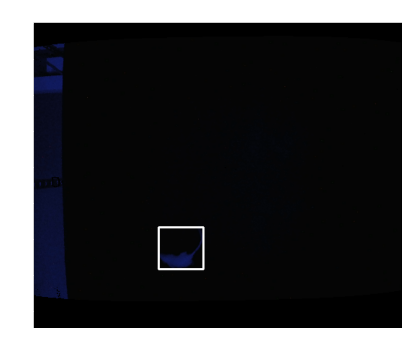

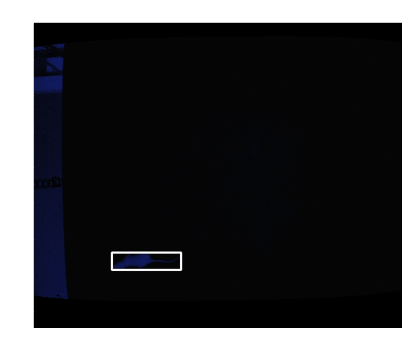

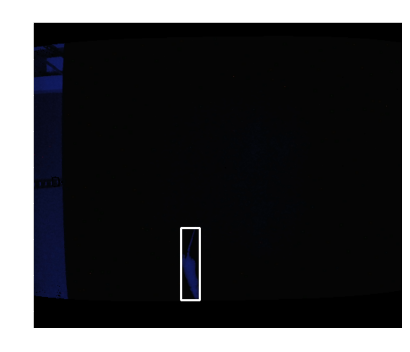

<Figure size 7200x7200 with 0 Axes>

In [106]:

for idx, cor in enumerate(label_list):
    image_path = cor[0]
    x, y, w, h = cor[1]
    img_ori = cv2.imread(image_path)
    cv2.rectangle(img_ori, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
    plt.subplot(15,3,idx+1)
    plt.imshow(img_ori, cmap='gray')
    plt.title(image_path) 
    plt.figure(figsize=(100, 100))
plt.show()

In [93]:
label_list[0]

['/content/rat_imgs/000000018_000001199_c.png', (205, 282, 28, 84)]